In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from model_training import accuracy_dt, accuracy_rf, accuracy_nb, accuracy_lr 


data = "../data/PremierProcessed/mergeDataOriginal.csv"

X = data.drop('FTR',axis = 1)
y= data['FTR']

model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_dt, accuracy_rf, accuracy_nb, accuracy_lr]
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to ensure a consistent scale
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='FTR', y='HST', data=data)
plt.title('Boxplot of Home Shots on Target (HST) by Full-Time Result (FTR)')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='FTR', y='AST', data=data)
plt.title('Boxplot of Away Shots on Target (AST) by Full-Time Result (FTR)')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='FTR', y='FTGoalDiff', data=data)
plt.title('Boxplot of Full Time Goal Difference by Full-Time Result (FTR)')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='FTR', y='HTGoalDiff', data=data)
plt.title('Boxplot of Half Time Goal Difference by Full-Time Result (FTR)')
plt.show()


        home_score   away_score      neutral  home_team_Albania  \
count  6491.000000  6491.000000  6491.000000        6491.000000   
mean      1.546603     1.050069     0.272377           0.004622   
std       1.554488     1.219811     0.445217           0.067832   
min       0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.000000     0.000000           0.000000   
50%       1.000000     1.000000     0.000000           0.000000   
75%       2.000000     2.000000     1.000000           0.000000   
max      15.000000    10.000000     1.000000           1.000000   

       home_team_Algeria  home_team_Andorra  home_team_Angola  \
count        6491.000000        6491.000000       6491.000000   
mean            0.010168           0.003697          0.002619   
std             0.100330           0.060699          0.051113   
min             0.000000           0.000000          0.000000   
25%             0.000000           0.000000          0.000000   
50%   

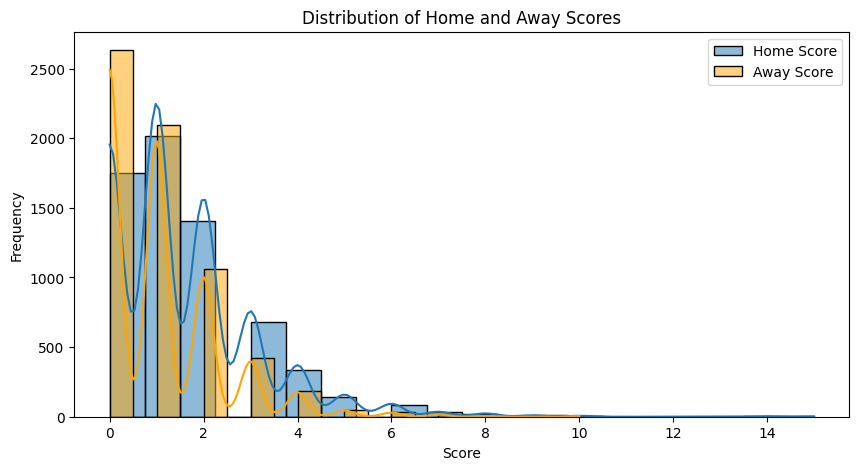

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataClean = pd.read_csv('../data/processed/resultsClean.csv')

# Create histograms for home scores and away scores
plt.figure(figsize=(10, 5))
sns.histplot(dataClean['home_score'], bins=20, kde=True, label='Home Score')
sns.histplot(dataClean['away_score'], bins=20, kde=True, color='orange', label='Away Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

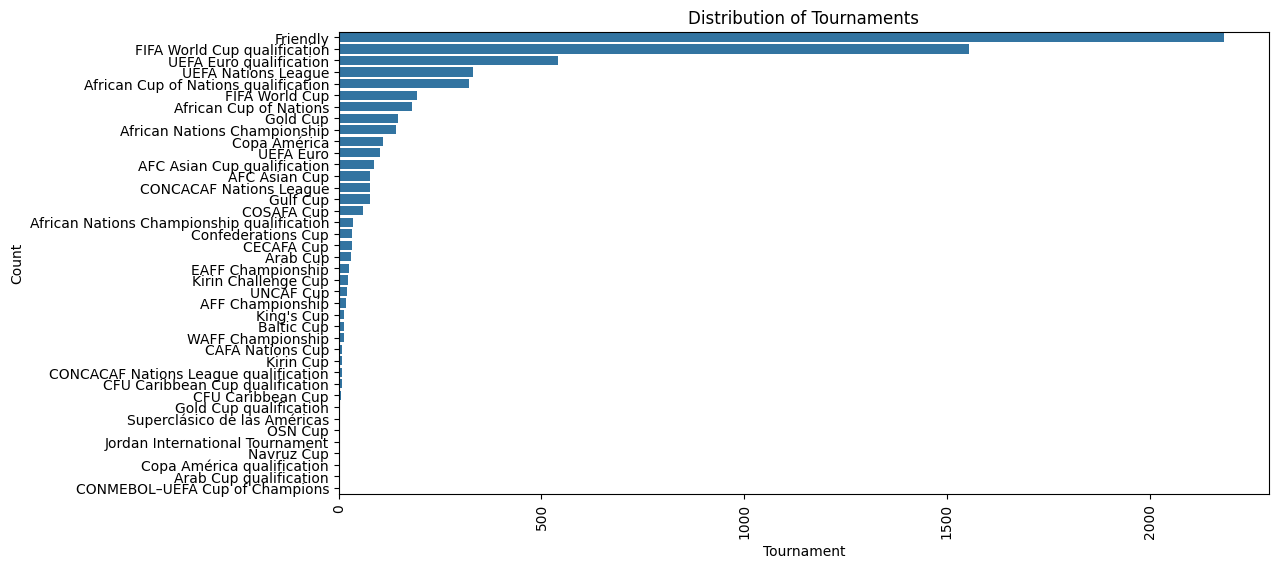

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataClean = pd.read_csv('../data/processed/resultsClean.csv')

# Create a bar plot for tournaments
plt.figure(figsize=(12, 6))
sns.countplot(dataClean['tournament'], order=dataClean['tournament'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Distribution of Tournaments')
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_16600\2673787018.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = dataClean[dataClean['home_team'].isin(top_12_teams) | dataClean['away_team'].isin(top_12_teams)][dataClean['home_team'].isin(top_12_teams) | dataClean['away_team'].isin(top_12_teams)]


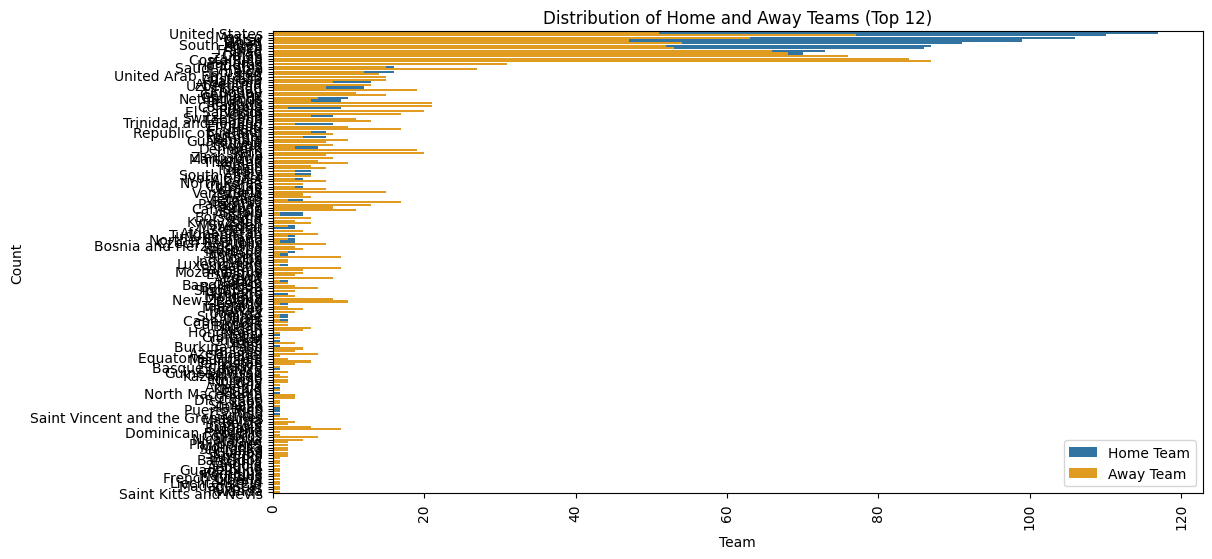

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataClean = pd.read_csv('../data/processed/resultsClean.csv')

# Calculate the total count of appearances for each team
team_counts = pd.concat([dataClean['home_team'], dataClean['away_team']]).value_counts()

# Select the top 12 teams
top_12_teams = team_counts[:12].index

# Filter the data to include only matches involving the top 12 teams
filtered_data = dataClean[dataClean['home_team'].isin(top_12_teams) | dataClean['away_team'].isin(top_12_teams)][dataClean['home_team'].isin(top_12_teams) | dataClean['away_team'].isin(top_12_teams)]

# Create a bar plot for home and away teams using the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(filtered_data['home_team'], order=filtered_data['home_team'].value_counts().index, label='Home Team')
sns.countplot(filtered_data['away_team'], order=filtered_data['away_team'].value_counts().index, color='orange', label='Away Team')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Distribution of Home and Away Teams (Top 12)')
plt.legend()
plt.show()
